In [82]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
#sharper plots
%config InlineBackend.figure_format = 'retina'


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     cross_val_score)
from sklearn.preprocessing import PolynomialFeatures

In [83]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [84]:
# loading data
data = pd.read_csv(
    DATA_PATH + "microchip_tests.txt",
    header=None,
    names=("test1", "test2", "released")
)
# getting some info about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   test1     118 non-null    float64
 1   test2     118 non-null    float64
 2   released  118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [85]:
data.groupby('released').describe().T

released             0          1
test1 count  60.000000  58.000000
      mean    0.090816   0.017499
      std     0.582990   0.389523
      min    -0.830070  -0.628460
      25%    -0.471490  -0.278510
      50%     0.094469  -0.078341
      75%     0.619997   0.322000
      max     1.070900   0.736750
test2 count  60.000000  58.000000
      mean    0.180203   0.186100
      std     0.586239   0.445792
      min    -0.769740  -0.601610
      25%    -0.367690  -0.190422
      50%     0.092838   0.242690
      75%     0.712352   0.569808
      max     1.108900   0.962720

In [86]:
data.tail()

,test1,test2,released
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0
117,0.632650,-0.030612,0


In [87]:
X = data.iloc[:, :2].values
y = data.iloc[:, 2].values

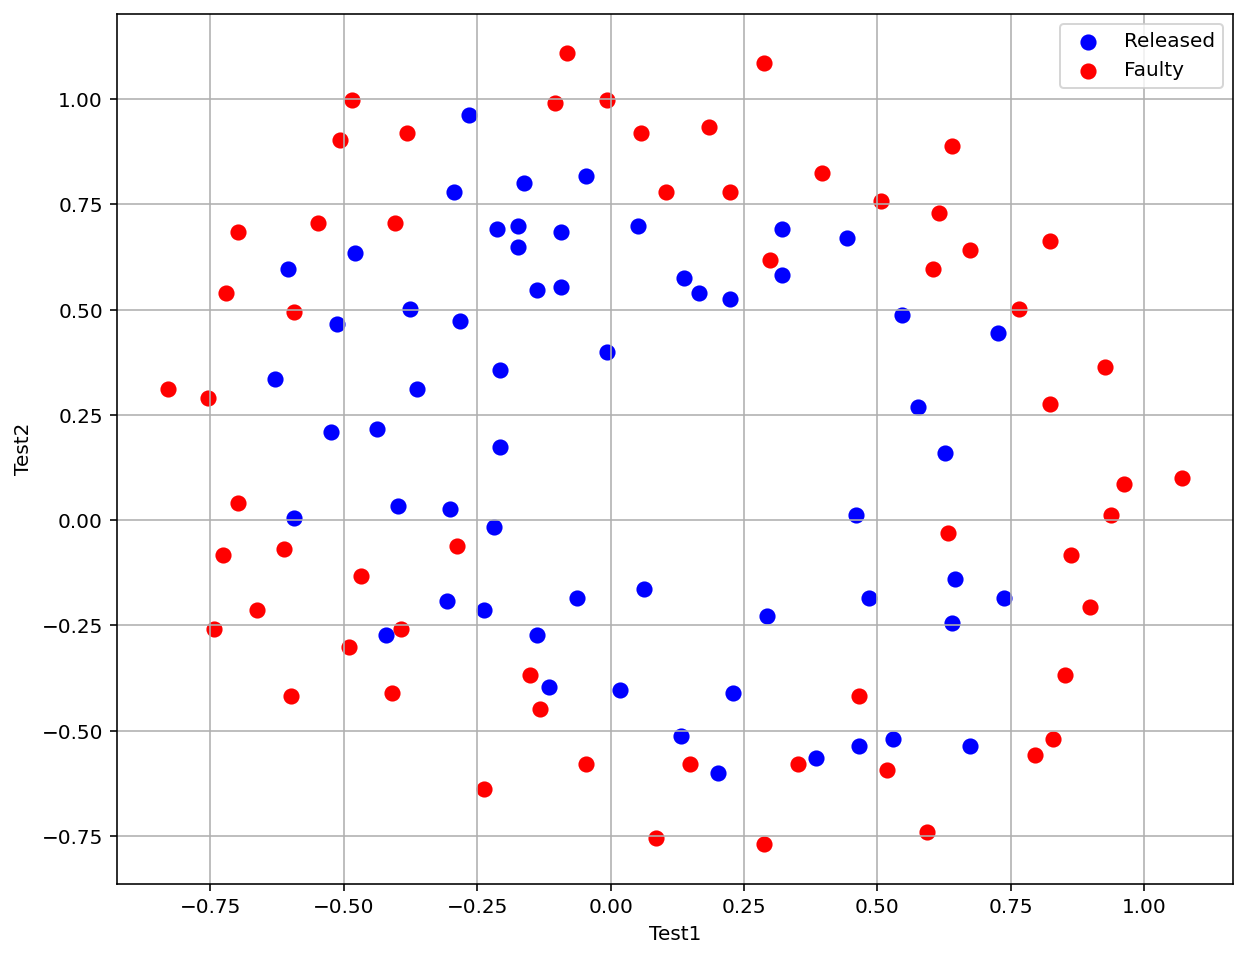

In [88]:
plt.figure(figsize=(10, 8))
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'blue', label = 'Released', s = 50)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'red', label = 'Faulty', s = 50)
plt.xlabel('Test1')
plt.ylabel('Test2')
plt.grid(True)
plt.legend()

In [89]:
def plot_boundary(clf, X, y, grid_step=0.01, poly_featurizer=None):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, grid_step), np.arange(y_min, y_max, grid_step)
    )

    # to every point from [x_min, m_max]x[y_min, y_max]
    # we put in correspondence its own color
    Z = clf.predict(poly_featurizer.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.figure(figsize = (10, 8))
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

In [90]:
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

In [91]:
X.shape

(118, 2)

In [92]:
X_poly.shape

(118, 36)

Accuracy on training set = 0.627


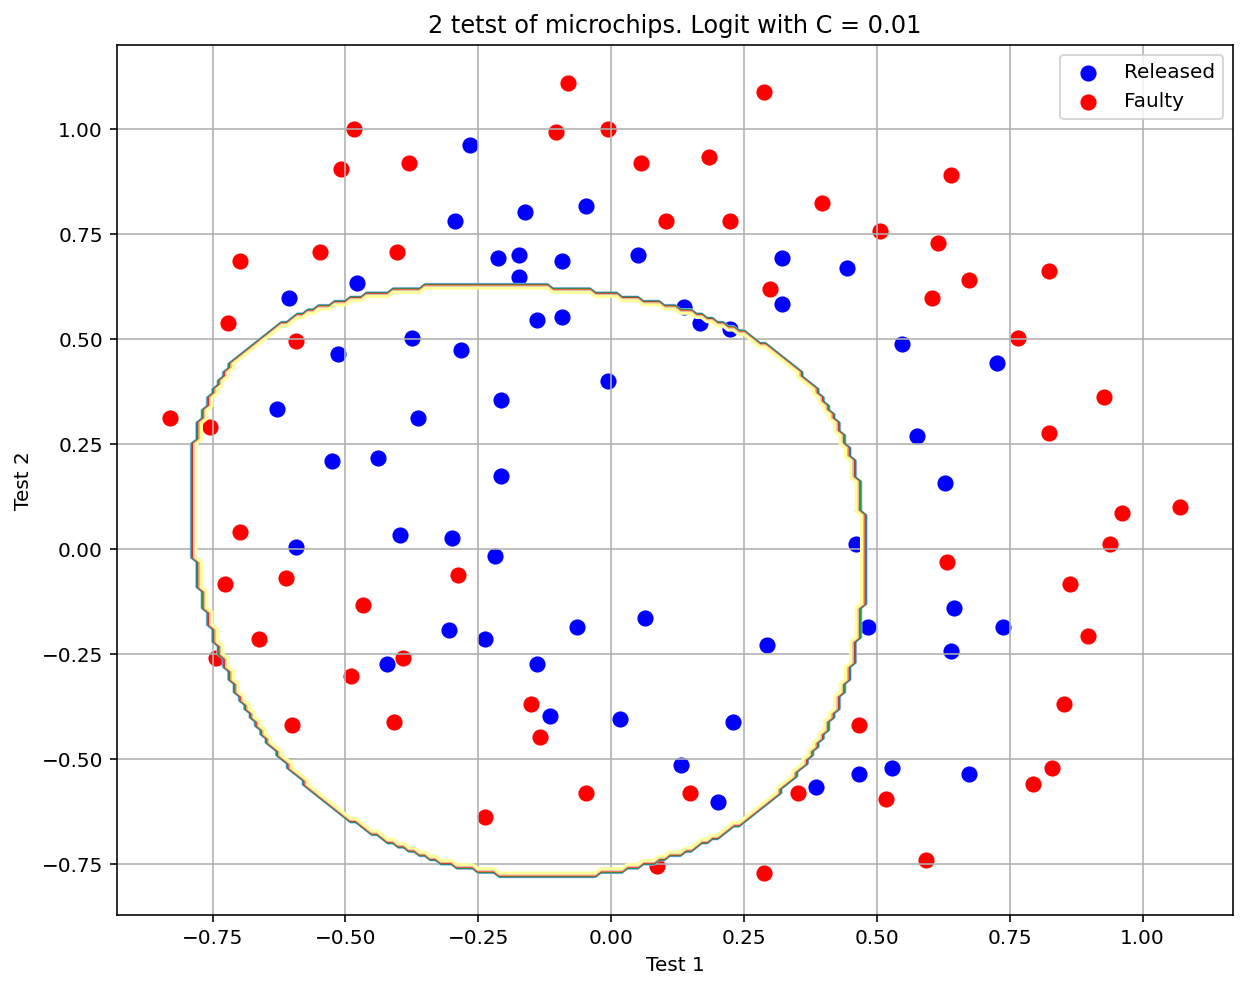

In [93]:
C = 1e-2
logit = LogisticRegression(C = C, random_state=17)
logit.fit(X_poly, y)
plot_boundary(logit, X, y, 0.01, poly)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'blue', label = 'Released', s = 50)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'red', label = 'Faulty', s = 50)
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title("2 tetst of microchips. Logit with C = %s" % C)
plt.grid()
plt.legend();

print(f'Accuracy on training set = {round(logit.score(X_poly, y), 3)}')

Accuracy on training set = 0.831


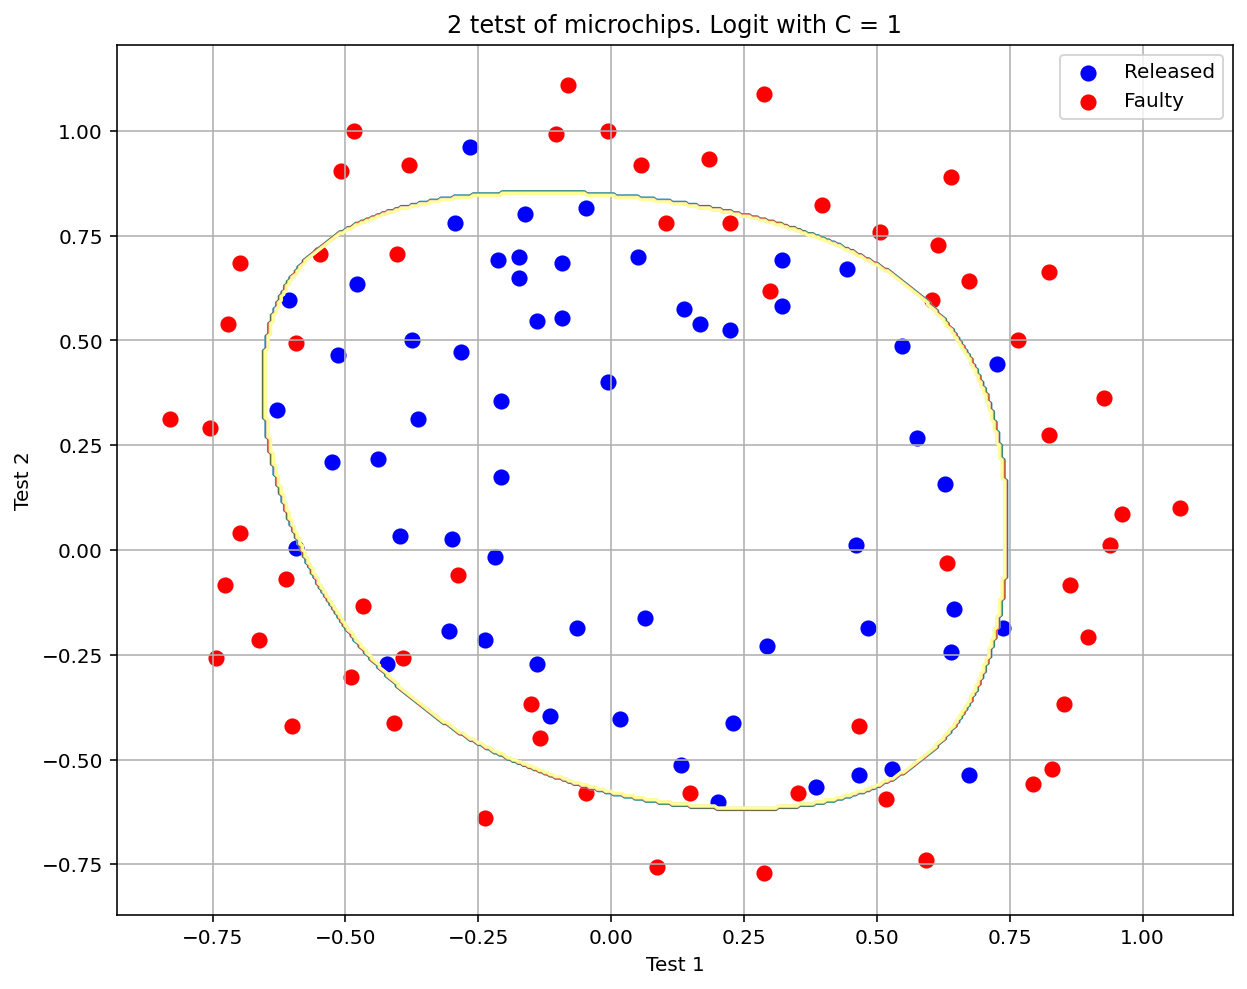

In [94]:
C = 1
logit = LogisticRegression(C = C, random_state=17)
logit.fit(X_poly, y)
plot_boundary(logit, X, y, 0.005, poly)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'blue', label = 'Released', s = 50)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'red', label = 'Faulty', s = 50)
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title("2 tetst of microchips. Logit with C = %s" % C)
plt.grid()
plt.legend();

print(f'Accuracy on training set = {round(logit.score(X_poly, y), 3)}')

Accuracy on training set = 0.873


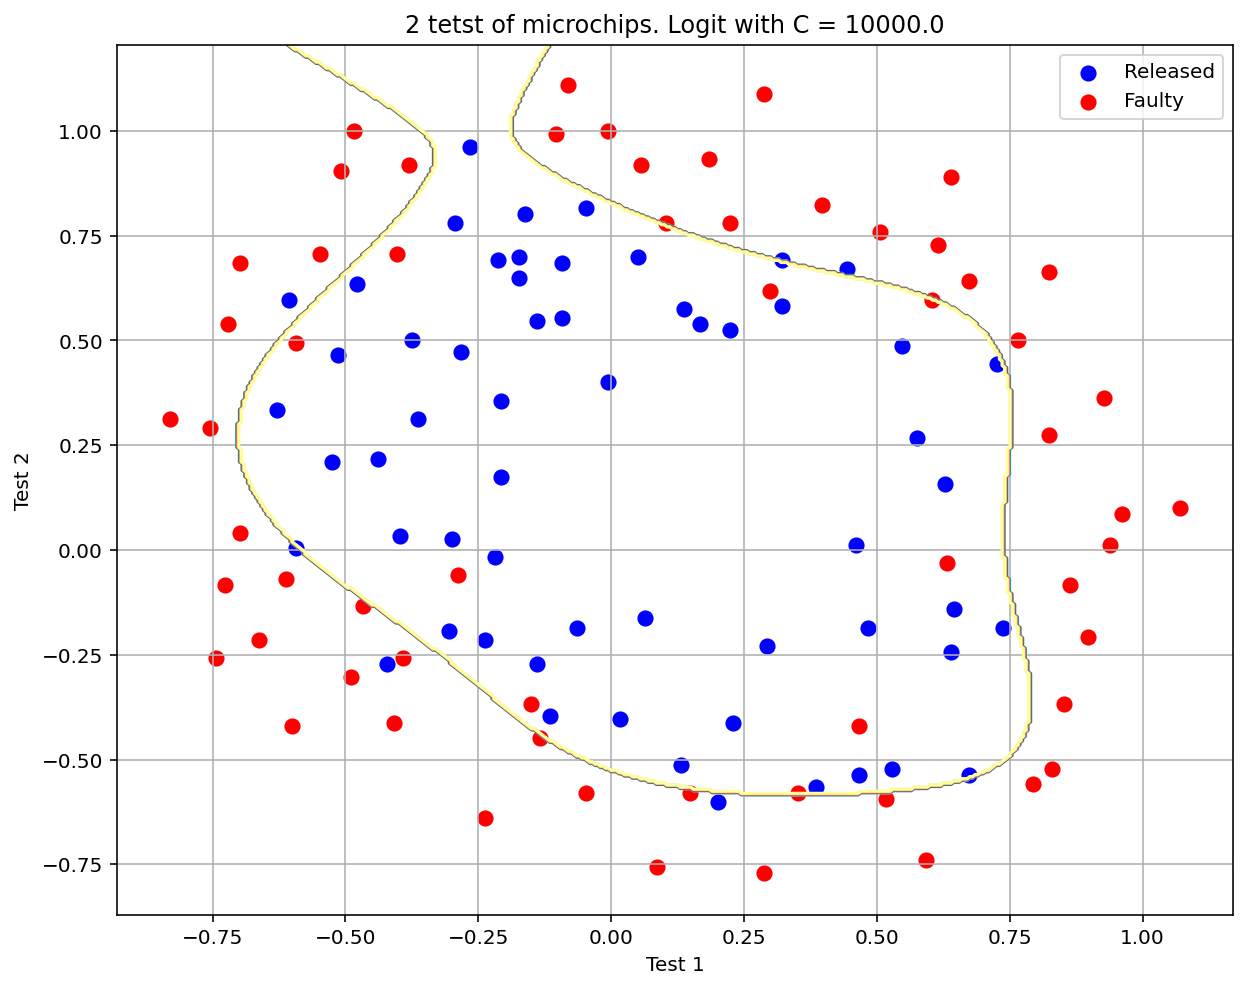

In [95]:
C = 1e4
logit = LogisticRegression(C = C, random_state=17)
logit.fit(X_poly, y)
plot_boundary(logit, X, y, 0.005, poly)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'blue', label = 'Released', s = 50)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c = 'red', label = 'Faulty', s = 50)
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title("2 tetst of microchips. Logit with C = %s" % C)
plt.grid()
plt.legend();

print(f'Accuracy on training set = {round(logit.score(X_poly, y), 3)}')

In [96]:
skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)
c_values = np.logspace(-2, 3, 500)
logistic_searcher = LogisticRegressionCV(Cs = c_values, cv = skf, n_jobs=-1)
logistic_searcher.fit(X_poly, y)

LogisticRegressionCV(Cs=array([1.00000000e-02, 1.02334021e-02, 1.04722519e-02, 1.07166765e-02,
       1.09668060e-02, 1.12227736e-02, 1.14847155e-02, 1.17527712e-02,
       1.20270833e-02, 1.23077980e-02, 1.25950646e-02, 1.28890361e-02,
       1.31898690e-02, 1.34977233e-02, 1.38127630e-02, 1.41351558e-02,
       1.44650734e-02, 1.48026913e-02, 1.51481892e-02, 1.55017512e-02,
       1.58635653e-02, 1.62...
       6.45088409e+02, 6.60144909e+02, 6.75552832e+02, 6.91320378e+02,
       7.07455942e+02, 7.23968114e+02, 7.40865683e+02, 7.58157646e+02,
       7.75853206e+02, 7.93961785e+02, 8.12493021e+02, 8.31456781e+02,
       8.50863158e+02, 8.70722485e+02, 8.91045332e+02, 9.11842520e+02,
       9.33125118e+02, 9.54904456e+02, 9.77192128e+02, 1.00000000e+03]),
                     cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
                     n_jobs=-1)

In [97]:
logistic_searcher.C_

array([150.78450459])

Text(0, 0.5, 'Mean CV-accuracy')

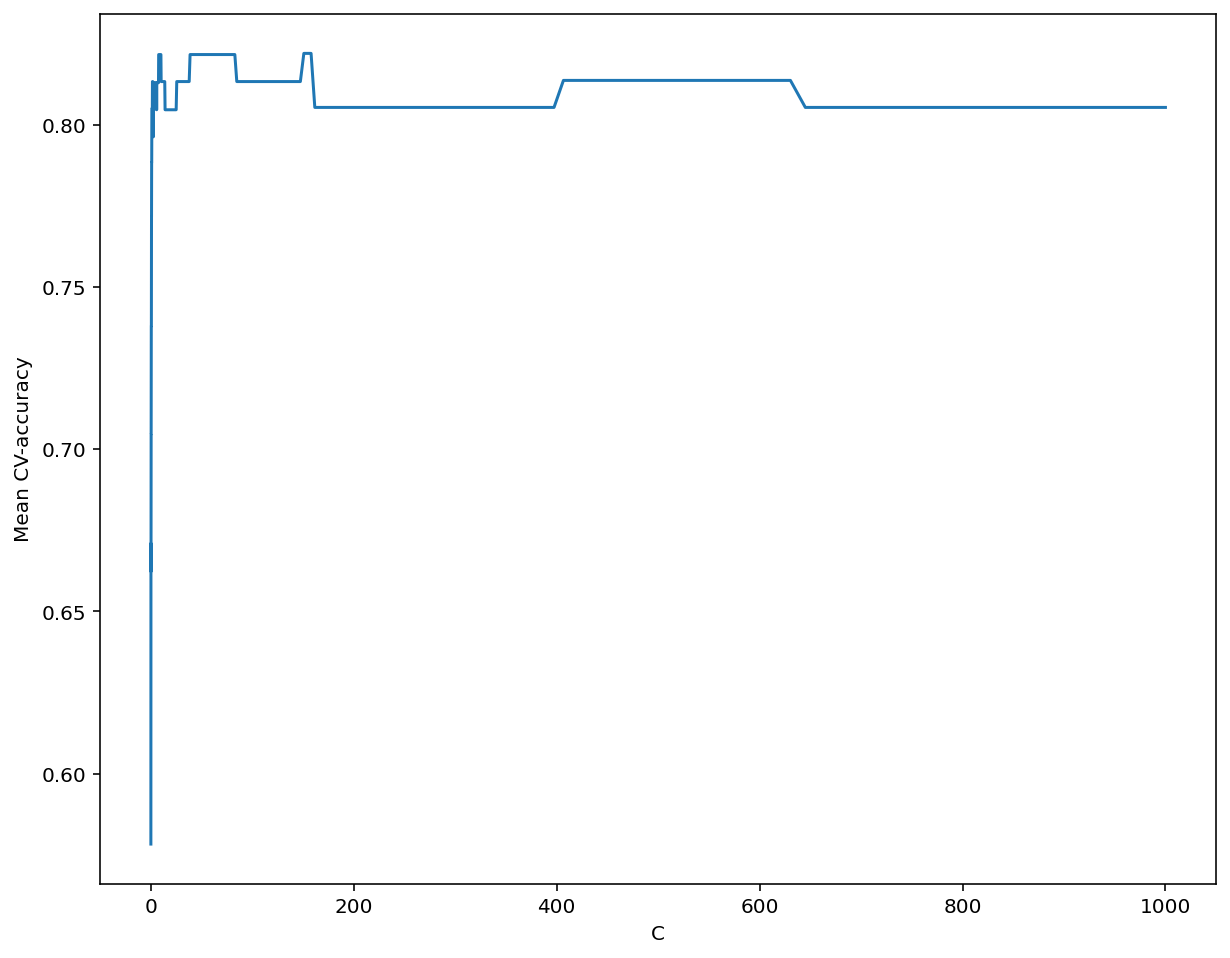

In [98]:
plt.figure(figsize = (10, 8))
plt.plot(c_values, np.mean(logistic_searcher.scores_[1], axis = 0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy')

(0.0, 10.0)

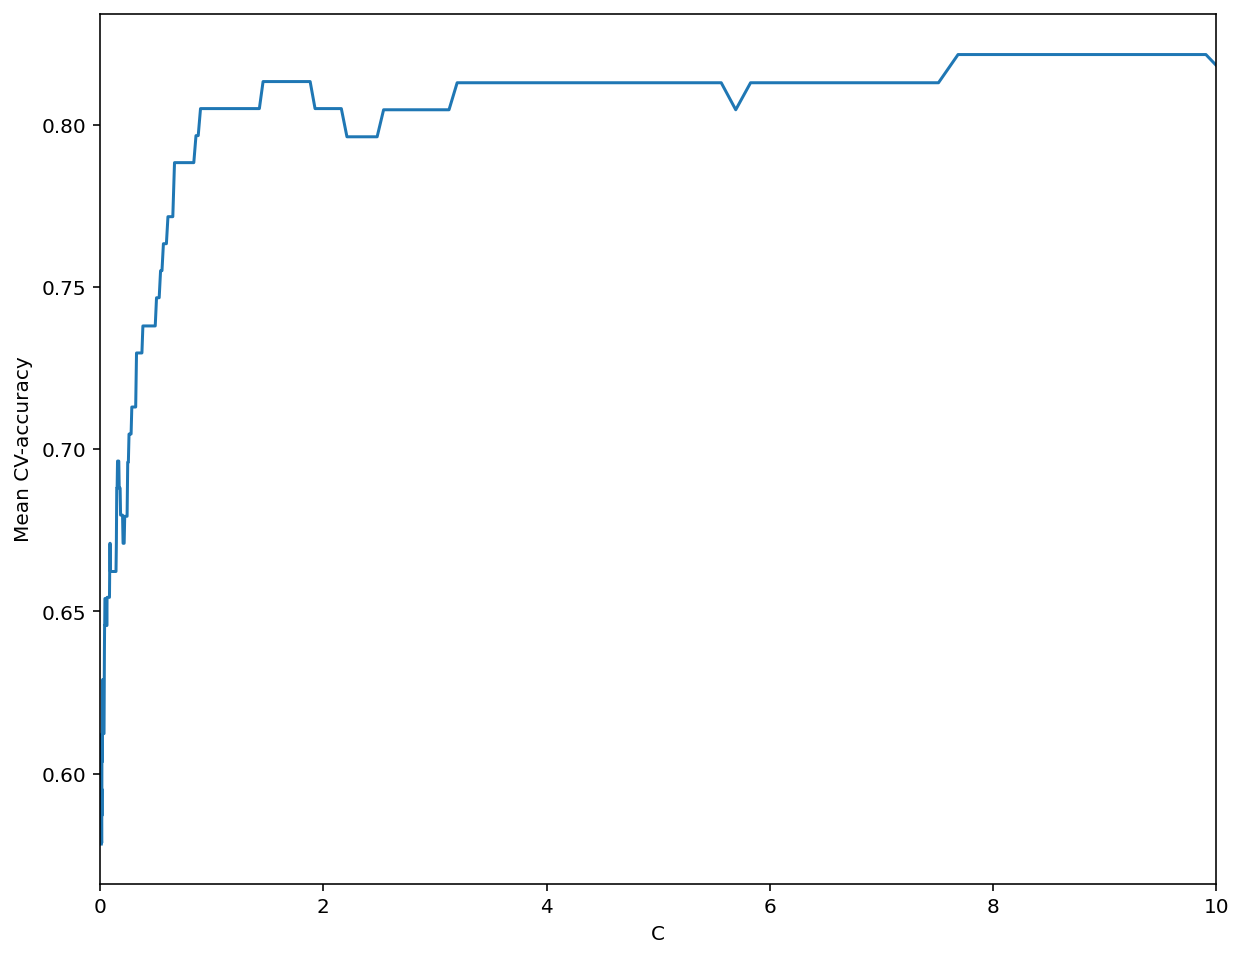

In [99]:
plt.figure(figsize = (10, 8))
plt.plot(c_values, np.mean(logistic_searcher.scores_[1], axis = 0))
plt.xlabel('C')
plt.ylabel('Mean CV-accuracy')
plt.xlim(0, 10)

In [100]:
import os
import numpy as np
import matplotlib.pyplot as plt
#sharper plots
%config InlineBackend.figure_format = 'retina'
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [101]:
import tarfile
from io import BytesIO

import requests

url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"


def load_imdb_dataset(extract_path, overwrite=False):
    # check if existed already
    if (
        os.path.isfile(os.path.join(extract_path, "aclImdb", "README"))
        and not overwrite
    ):
        print("IMDB dataset is already in place.")
        return

    print("Downloading the dataset from:  ", url)
    response = requests.get(url)

    tar = tarfile.open(mode="r:gz", fileobj=BytesIO(response.content))

    data = tar.extractall(extract_path)

In [102]:
DATA_PATH = "../../_static/data/"
load_imdb_dataset(extract_path=DATA_PATH)

IMDB dataset is already in place.


In [103]:
PATH_TO_IMDB = DATA_PATH + "aclImdb"

reviews_train = load_files(
    os.path.join(PATH_TO_IMDB, "train"), categories=["pos", "neg"]
)
text_train, y_train = reviews_train.data, reviews_train.target

reviews_test = load_files(os.path.join(PATH_TO_IMDB, "test"), categories=["pos", "neg"])
text_test, y_test = reviews_test.data, reviews_test.target

In [104]:
print("Number of documents in training data: %d" % len(text_train))
print(np.bincount(y_train))
print("Number of documents in test data: %d" % len(text_test))
print(np.bincount(y_test))

Number of documents in training data: 25000
[12500 12500]
Number of documents in test data: 25000
[12500 12500]


In [105]:
text_train[1]

b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decision" should without a doubt be you\'re choice over this one, even the "Turbulenc

In [106]:
y_train[1]

0

In [107]:
text_train[2]

b'Everyone plays their part pretty well in this "little nice movie". Belushi gets the chance to live part of his life differently, but ends up realizing that what he had was going to be just as good or maybe even better. The movie shows us that we ought to take advantage of the opportunities we have, not the ones we do not or cannot have. If U can get this movie on video for around $10, it\xc2\xb4d be an investment!'

In [108]:
y_train[2]

1

In [109]:
cv = CountVectorizer()
cv.fit(text_train)

CountVectorizer()

In [110]:
len(cv.vocabulary_)

74849

In [111]:
print(cv.get_feature_names_out()[:50])
print(cv.get_feature_names_out()[50000:50050])

['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02'
 '020410' '029' '03' '04' '041' '05' '050' '06' '06th' '07' '08' '087'
 '089' '08th' '09' '0f' '0ne' '0r' '0s' '10' '100' '1000' '1000000'
 '10000000000000' '1000lb' '1000s' '1001' '100b' '100k' '100m']
['pincher' 'pinchers' 'pinches' 'pinching' 'pinchot' 'pinciotti' 'pine'
 'pineal' 'pineapple' 'pineapples' 'pines' 'pinet' 'pinetrees' 'pineyro'
 'pinfall' 'pinfold' 'ping' 'pingo' 'pinhead' 'pinheads' 'pinho' 'pining'
 'pinjar' 'pink' 'pinkerton' 'pinkett' 'pinkie' 'pinkins' 'pinkish'
 'pinko' 'pinks' 'pinku' 'pinkus' 'pinky' 'pinnacle' 'pinnacles' 'pinned'
 'pinning' 'pinnings' 'pinnochio' 'pinnocioesque' 'pino' 'pinocchio'
 'pinochet' 'pinochets' 'pinoy' 'pinpoint' 'pinpoints' 'pins' 'pinsent']


In [112]:
X_train = cv.transform(text_train)
X_train

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [113]:
print(text_train[19726])

b'This movie is terrible but it has some good effects.'


In [114]:
X_train[19726].nonzero()[1]

array([ 9881, 21020, 28068, 29999, 34585, 34683, 44147, 61617, 66150,
       66562], dtype=int32)

In [115]:
X_train[19726].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([ 9881, 21020, 28068, 29999, 34585, 34683, 44147, 61617, 66150,
        66562], dtype=int32))

In [116]:
X_test = cv.transform(text_test)

In [117]:
%%time
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=7)
logit.fit(X_train, y_train)

CPU times: user 32.7 ms, sys: 42.2 ms, total: 74.9 ms
Wall time: 2.48 s


/Users/vladimirberman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1, random_state=7)

In [118]:
round(logit.score(X_train, y_train), 3), round(logit.score(X_test, y_test), 3)

(0.981, 0.864)

In [119]:
def visualize_coefficients(classifier, feature_names, n_top_features=25):
    # get coefficients with large absolute values
    coef = classifier.coef_.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(1, 1 + 2 * n_top_features),
        feature_names[interesting_coefficients],
        rotation=60,
        ha="right",
    );

In [132]:
def plot_grid_scores(grid, param_name):
    plt.figure(figsize=(20, 10))
    plt.plot(
        grid.param_grid[param_name],
        grid.cv_results_["mean_train_score"],
        color="green",
        label="train",
    )
    plt.plot(
        grid.param_grid[param_name],
        grid.cv_results_["mean_test_score"],
        color="red",
        label="test",
    )
    plt.legend();

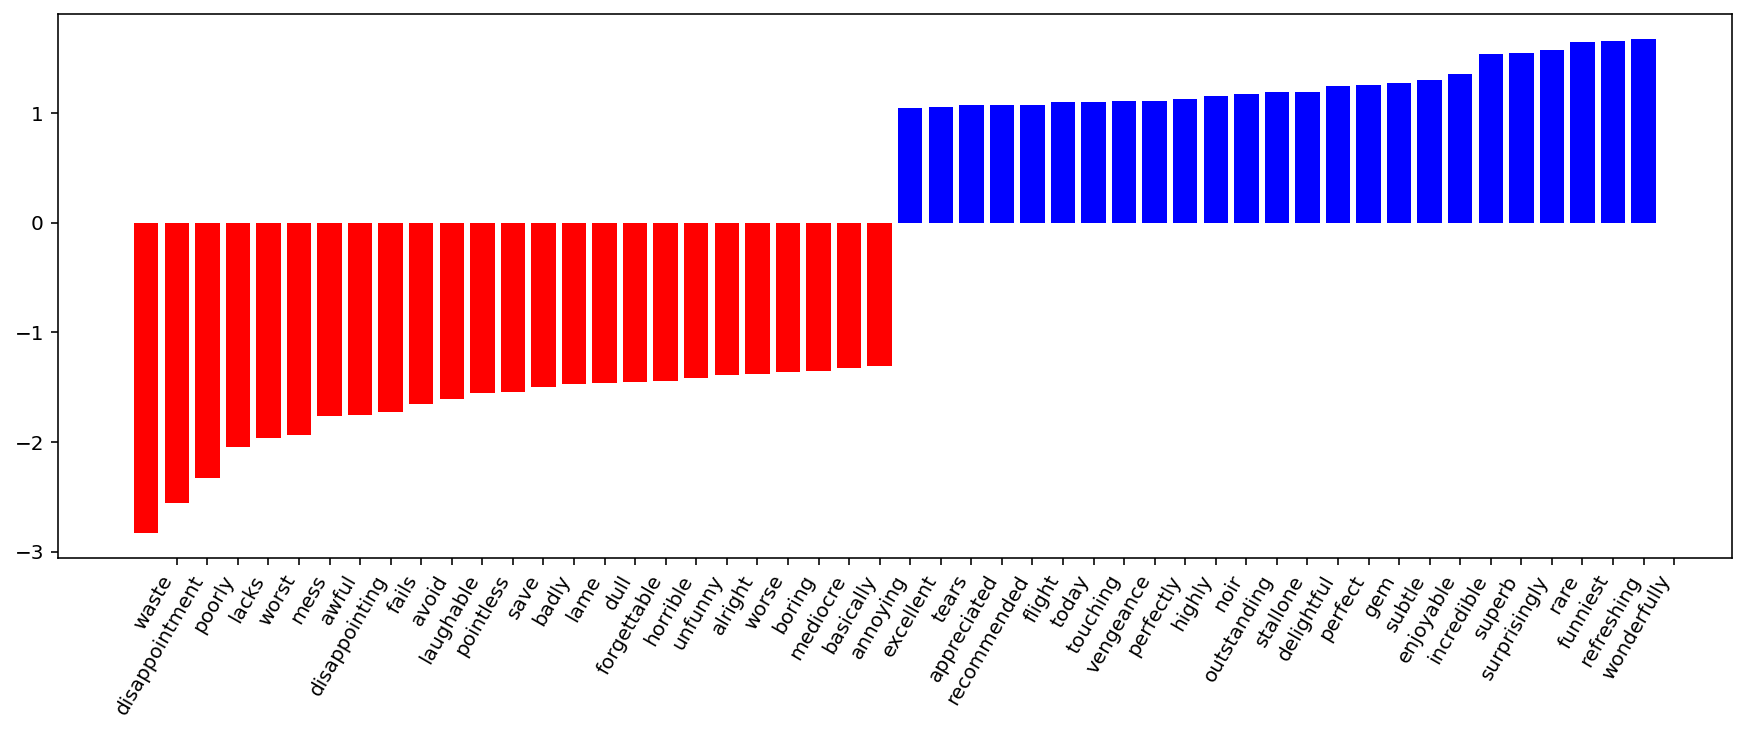

In [121]:
visualize_coefficients(logit, cv.get_feature_names_out());

In [124]:
%%time
from sklearn.pipeline import make_pipeline
text_pipe_logit = make_pipeline(CountVectorizer(), LogisticRegression(solver='lbfgs', n_jobs=1, random_state=7))

text_pipe_logit.fit(text_train, y_train)
print(text_pipe_logit.score(text_test, y_test))

0.86404
CPU times: user 23.3 s, sys: 467 ms, total: 23.8 s
Wall time: 8.49 s


In [126]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid_logit = {'logisticregression__C' : np.logspace(-5, 0, 6)}
grid_logit = GridSearchCV(text_pipe_logit, param_grid_logit, return_train_score=True, cv = 3, n_jobs=-1)

grid_logit.fit(text_train, y_train)

/Users/vladimirberman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vladimirberman/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

CPU times: user 19.5 s, sys: 1.18 s, total: 20.6 s
Wall time: 30.9 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(n_jobs=1,
                                                           random_state=7))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00])},
             return_train_score=True)

In [127]:
grid_logit.best_params_, grid_logit.best_score_

({'logisticregression__C': 0.1}, 0.8854799308363024)

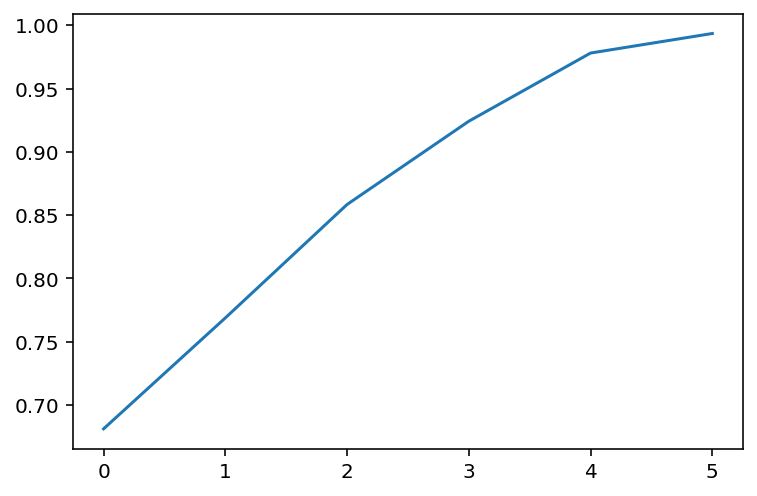

In [128]:
plt.plot(grid_logit.cv_results_["mean_train_score"],)

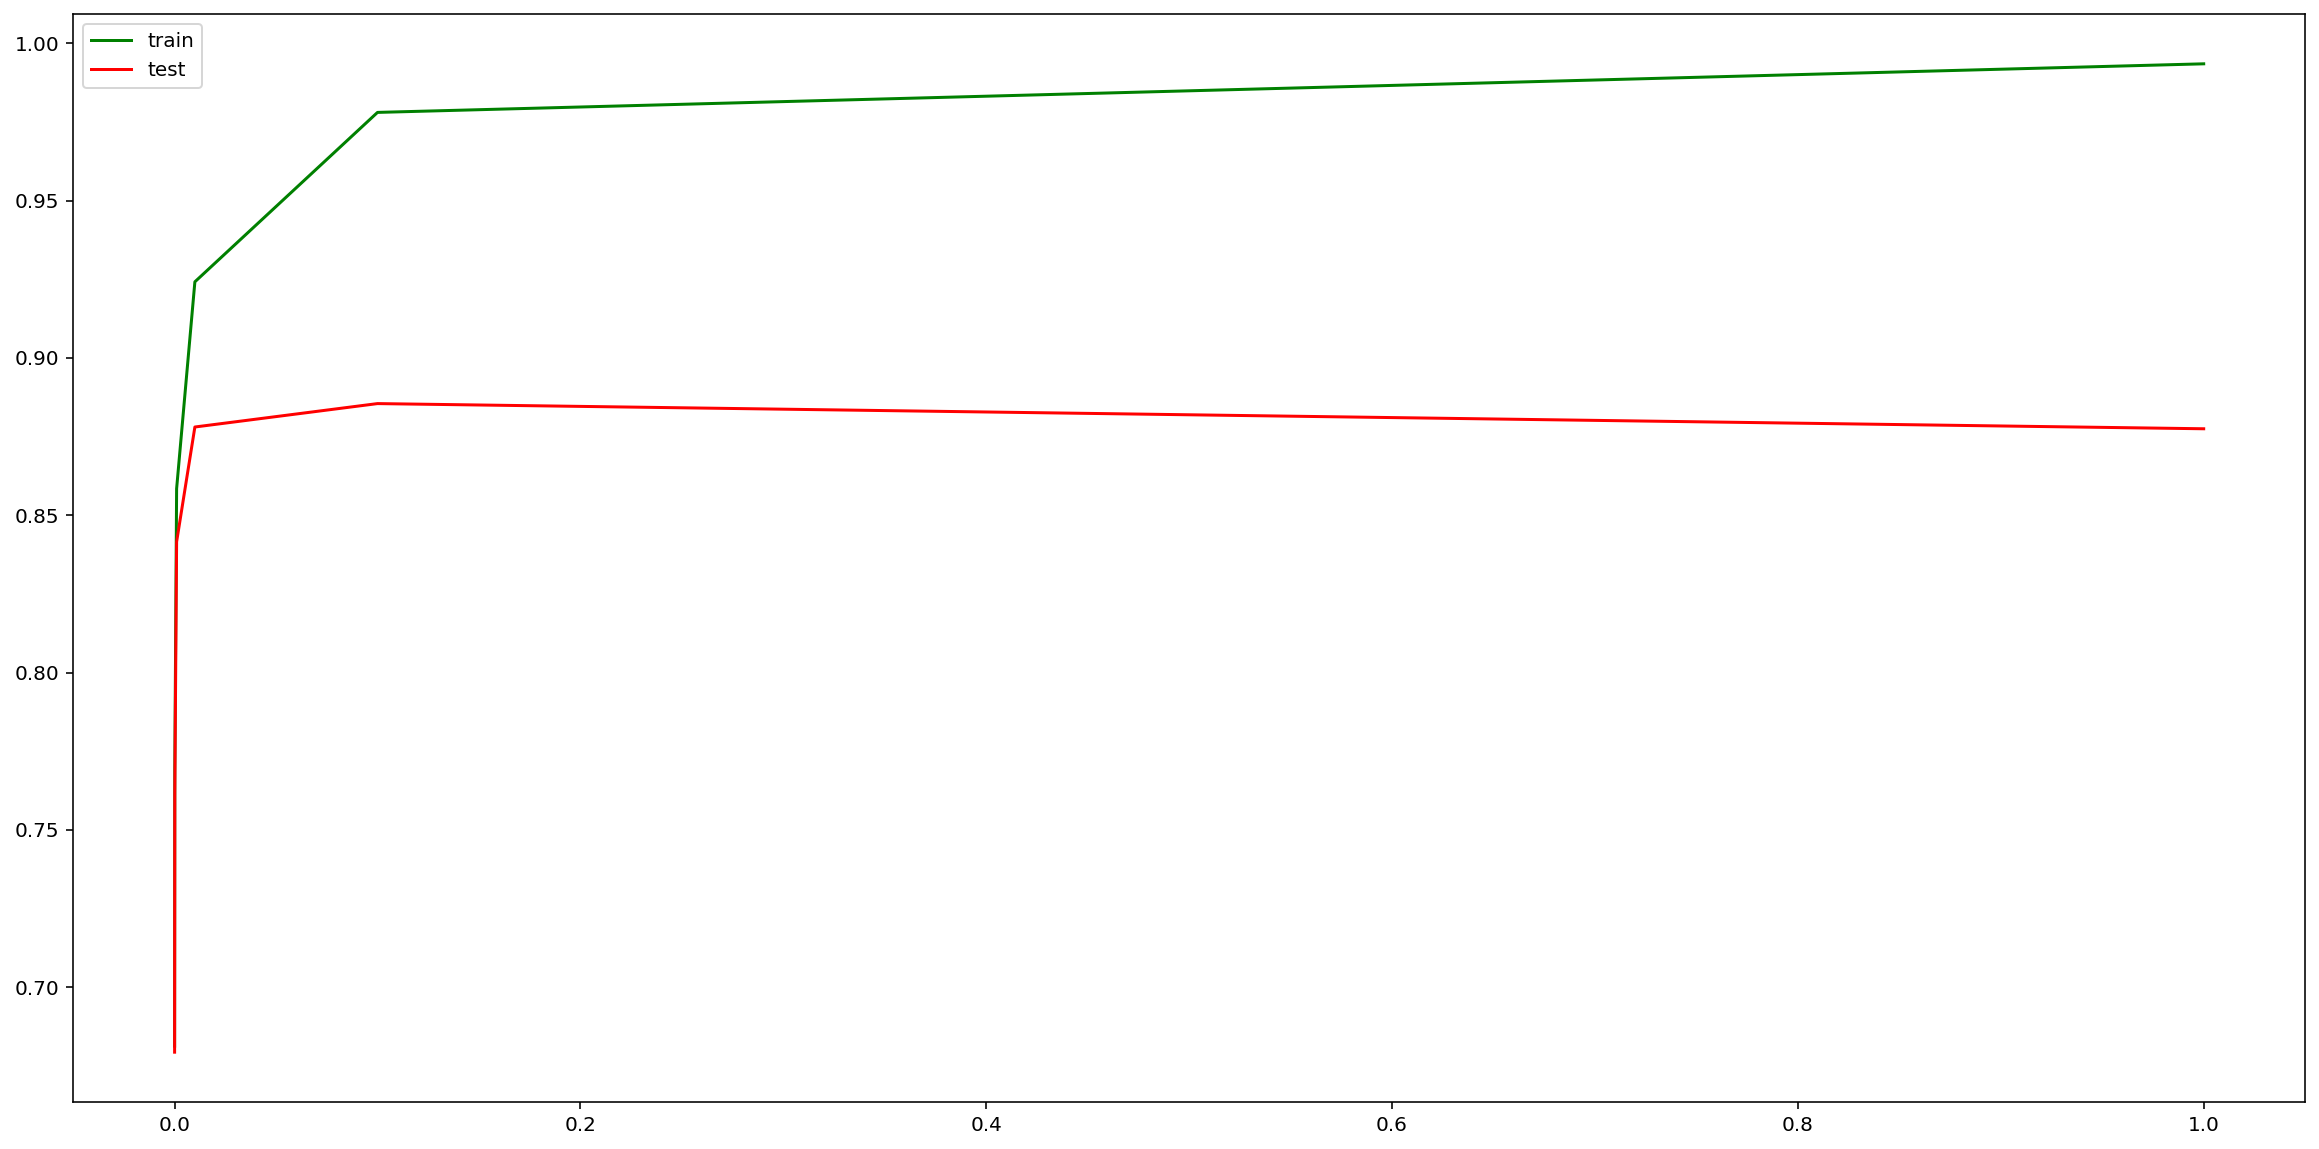

In [133]:
plot_grid_scores(grid_logit, 'logisticregression__C')

In [134]:
grid_logit.score(text_train, y_train)

0.96832

In [135]:
grid_logit.score(text_test, y_test)

0.87812

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
forest = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)

In [138]:
%%time
forest.fit(X_train, y_train)

CPU times: user 3min 31s, sys: 1.25 s, total: 3min 32s
Wall time: 14.7 s


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=17)

In [139]:
round(forest.score(X_test, y_test), 3)

0.855

In [140]:
rng = r=np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

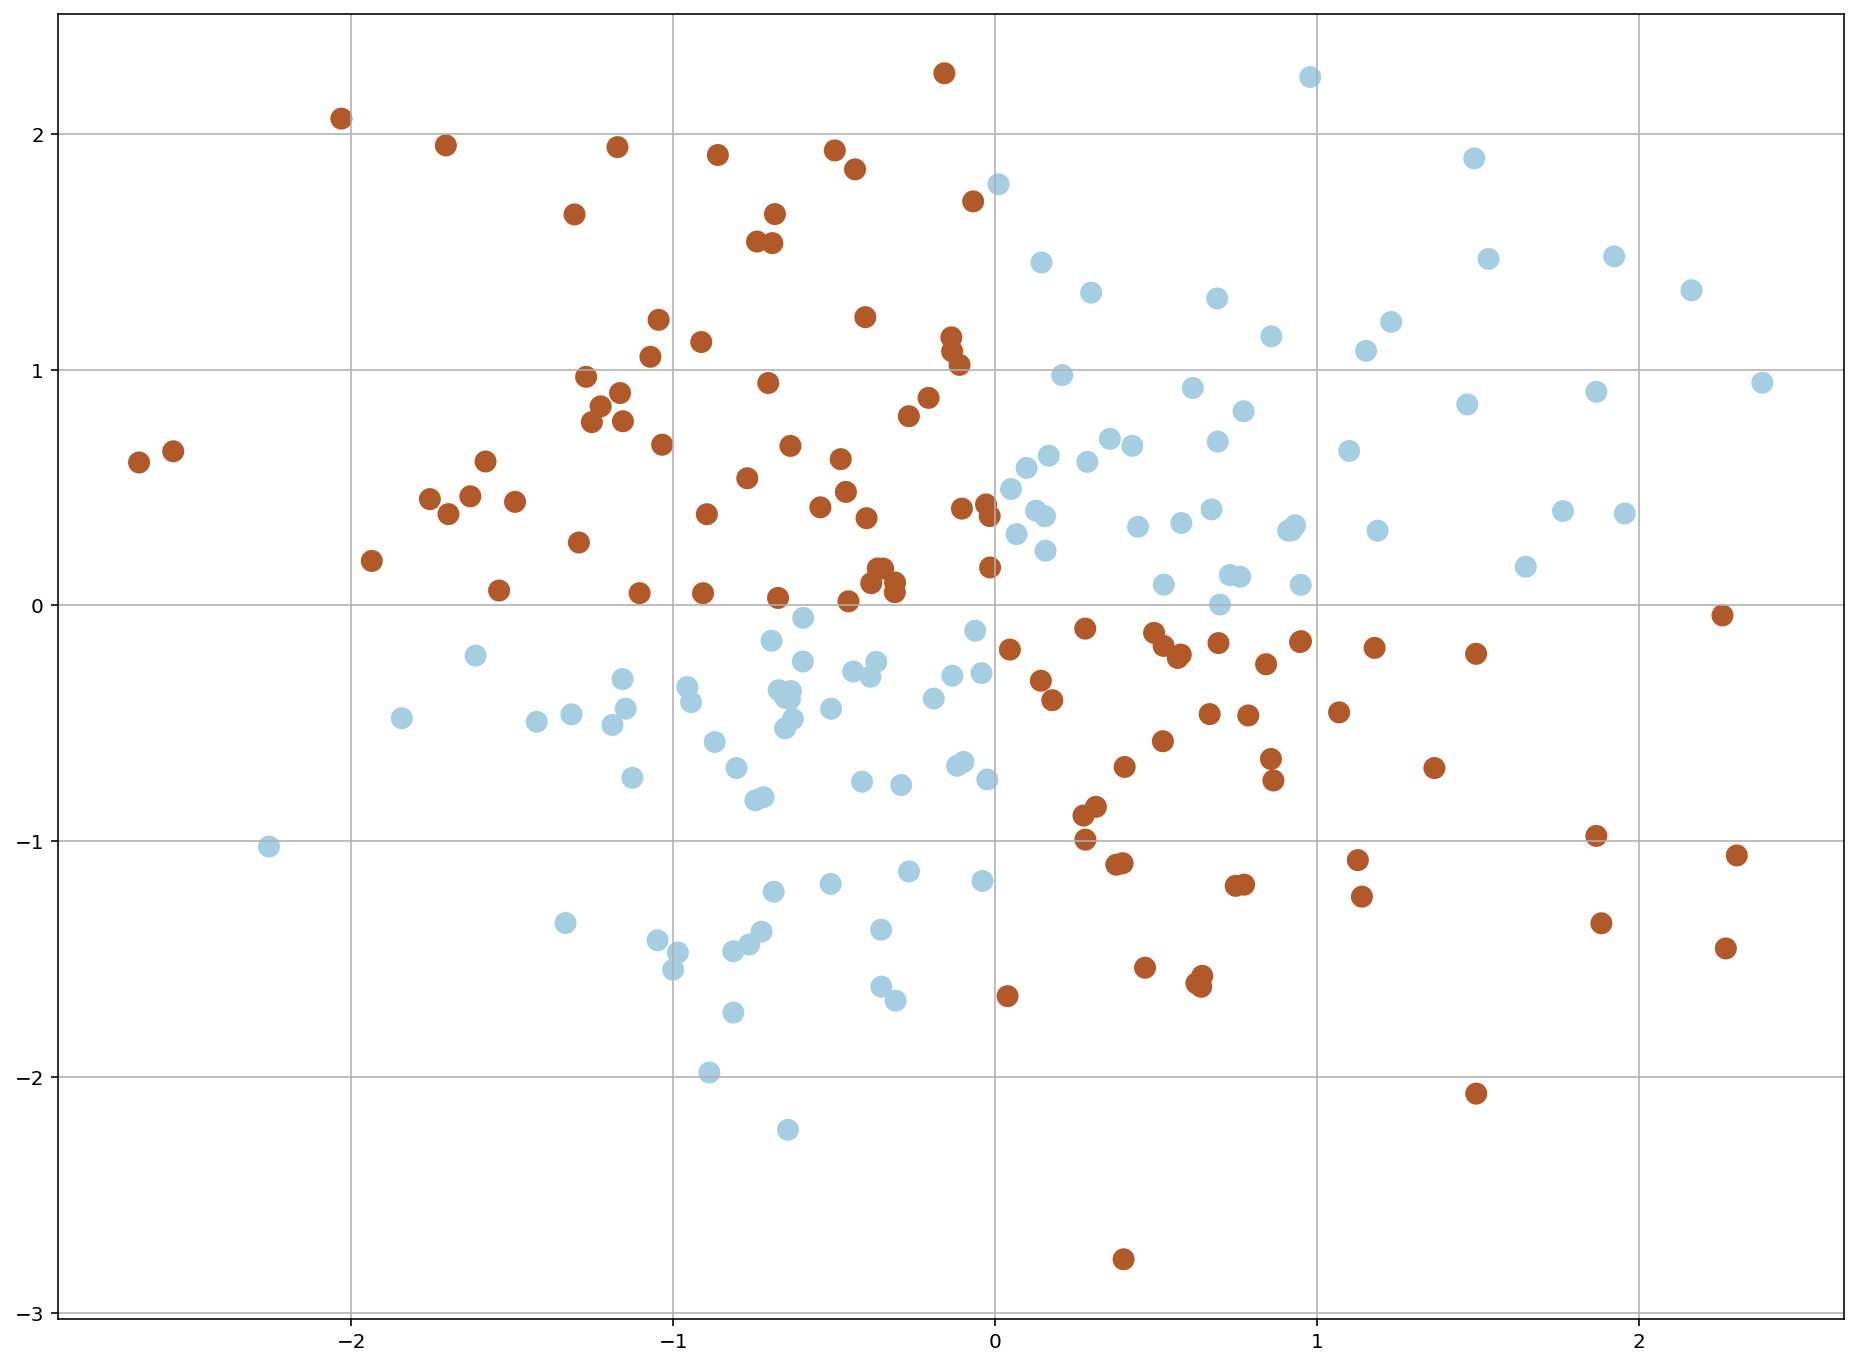

In [147]:
plt.figure(figsize=(16,12))
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Paired, s = 100)
plt.grid()

In [150]:
def plot_boundary(clf, X, y, plot_title):
    plt.figure(figsize=(16,12))
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.PuOr_r,
    )
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes="--")
    plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);

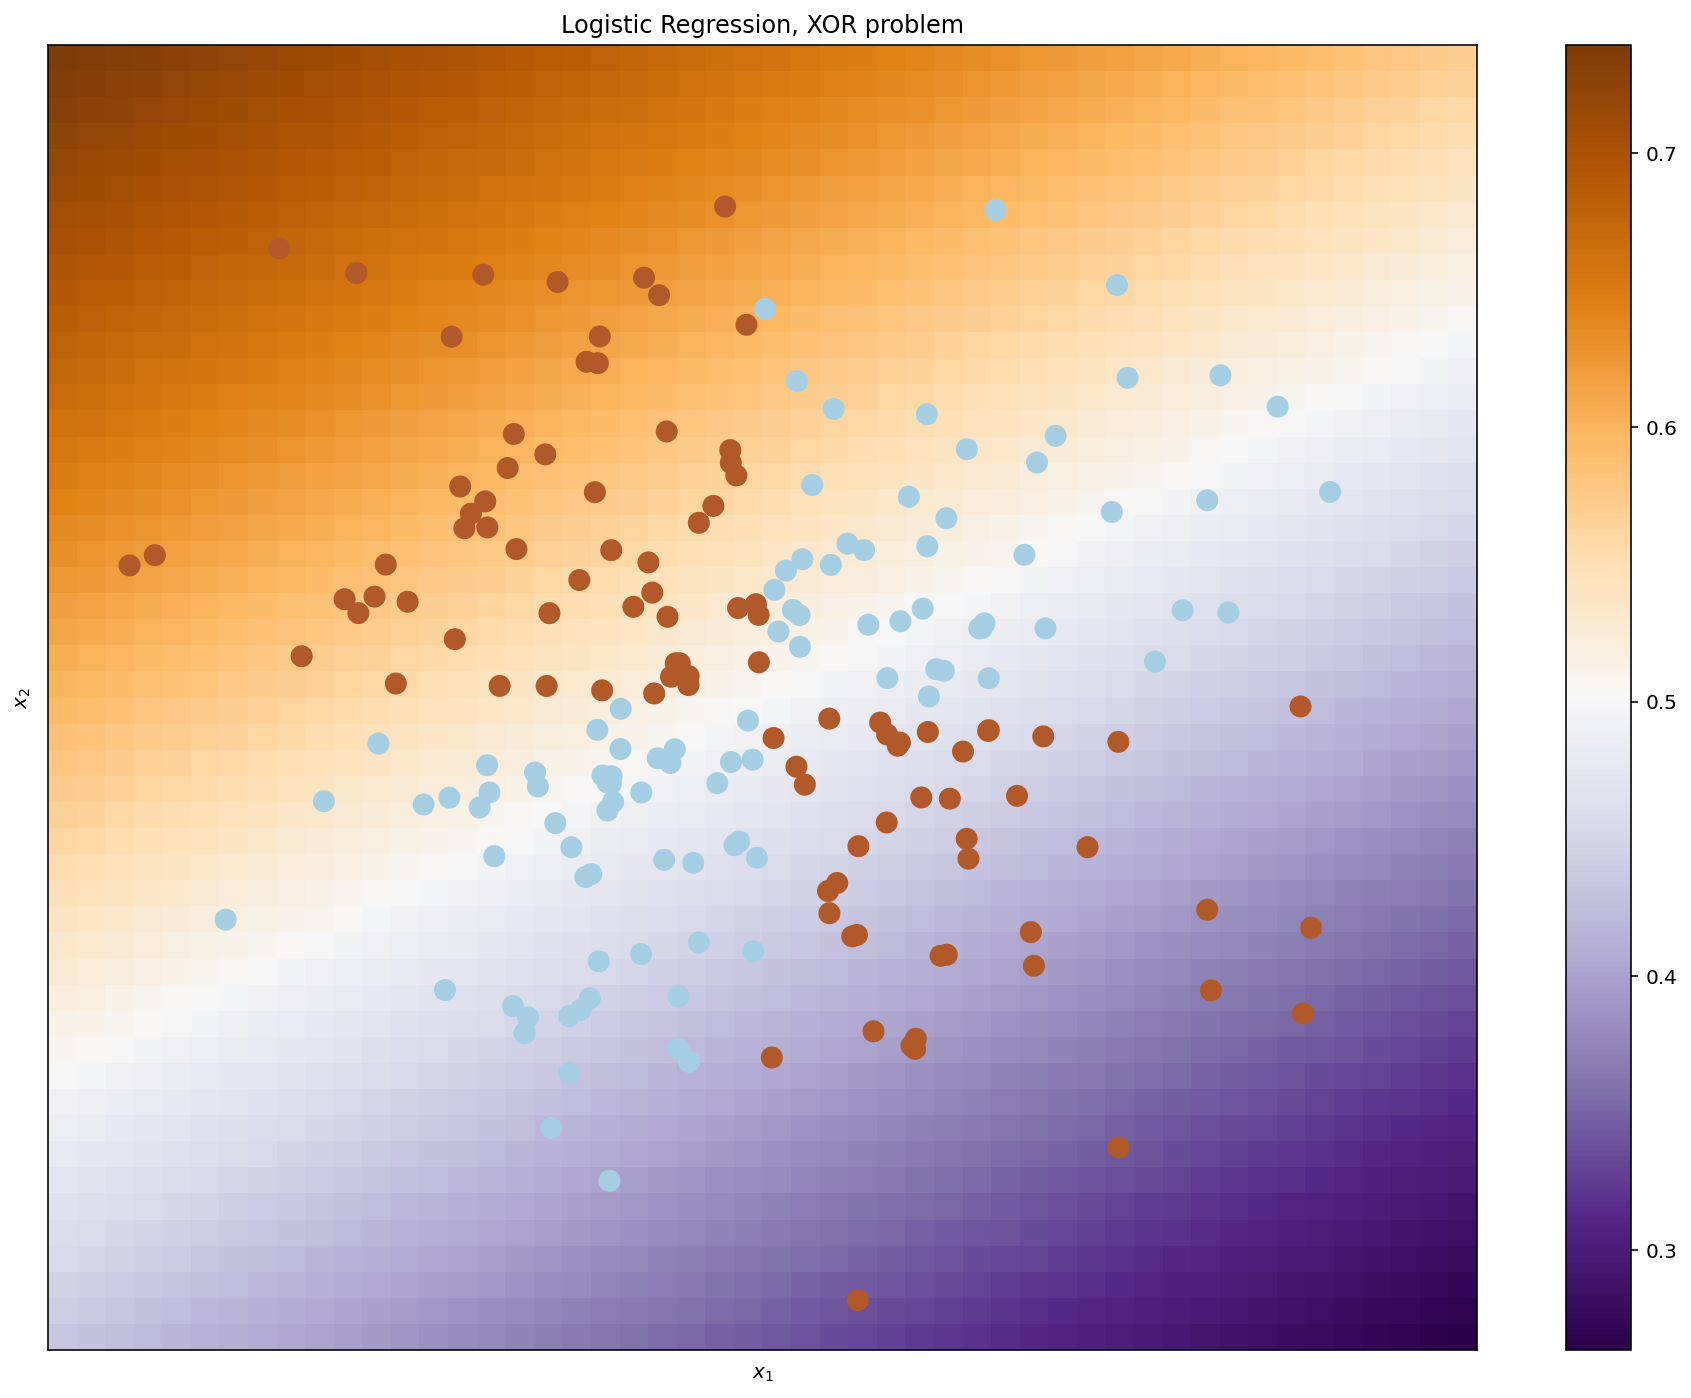

In [151]:
plot_boundary(
    LogisticRegression(solver="lbfgs"), X, y, "Logistic Regression, XOR problem"
)

In [152]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [157]:
logit_pipe = Pipeline([('poly',PolynomialFeatures(degree=2)), ('logit', LogisticRegression(solver='lbfgs'))])

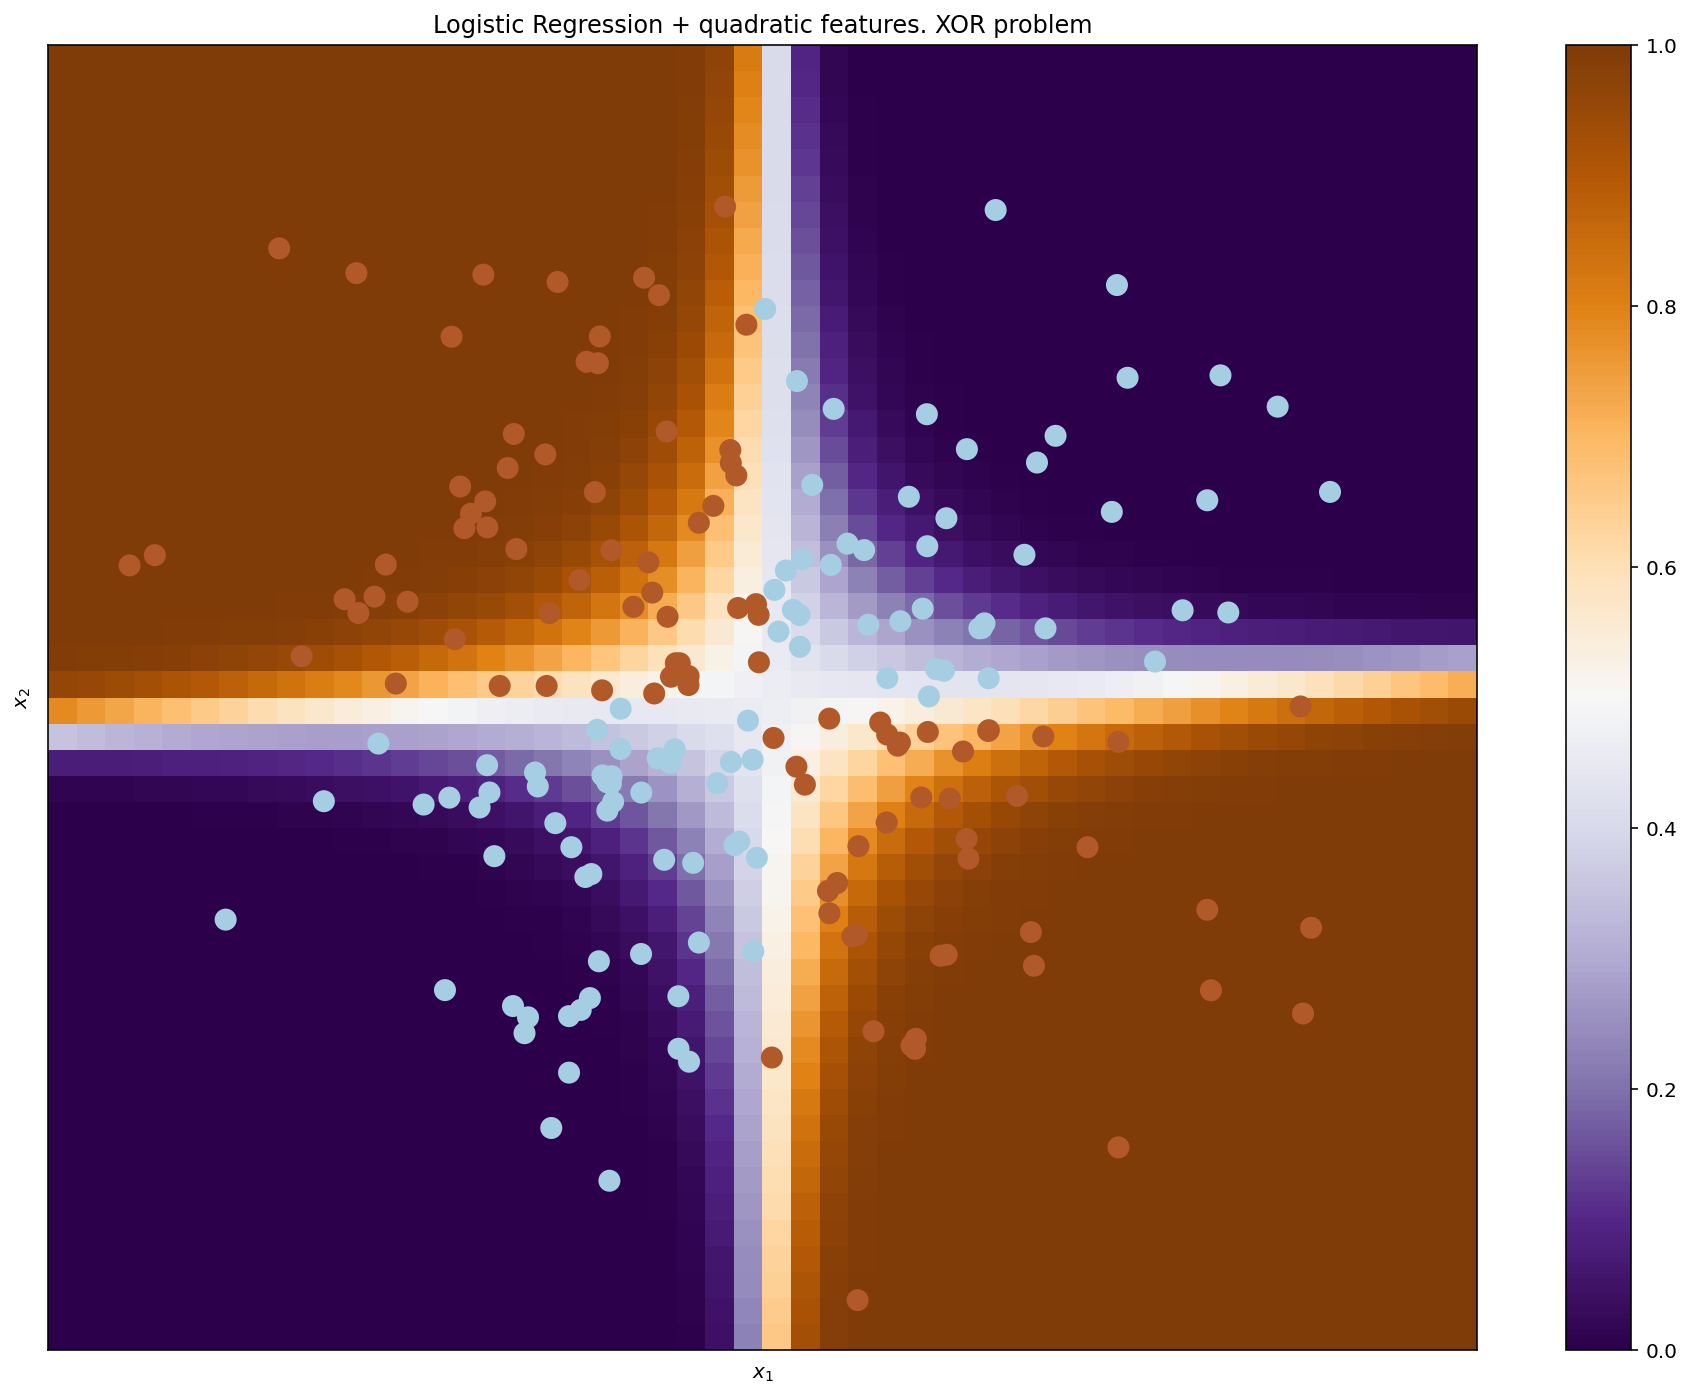

In [158]:
plot_boundary(logit_pipe, X, y, "Logistic Regression + quadratic features. XOR problem")

In [159]:
logit_pipe.score(X, y)

0.975

In [160]:
import warnings
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
#sharper plots
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV,
                                  SGDClassifier)
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

warnings.filterwarnings("ignore")

In [161]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/"

In [162]:
data = pd.read_csv(DATA_PATH + 'telecom_churn.csv').drop('State', axis=1)
data['International plan'] = data['International plan'].map({'Yes' : 1, 'No' : 0})
data['Voice mail plan'] = data['Voice mail plan'].map({'Yes' : 1, 'No' : 0})

In [163]:
y = data['Churn'].astype('int').values
X = data.drop('Churn', axis=1).values

In [165]:
alphas = np.logspace(-2, 0, 20)
sgd_logit = SGDClassifier(loss = 'log', n_jobs=-1, random_state=17, max_iter=5)
logit_pipe = Pipeline([('scaler', StandardScaler()), ('poly', PolynomialFeatures(degree=2)), ('sgd_logit', sgd_logit)])

In [166]:
val_train, val_test = validation_curve(estimator=logit_pipe, X=X, y=y, param_name='sgd_logit__alpha', param_range=alphas, scoring='roc_auc')

In [170]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor = 'none', facecolor = lines[0].get_color(), alpha = 0.2)


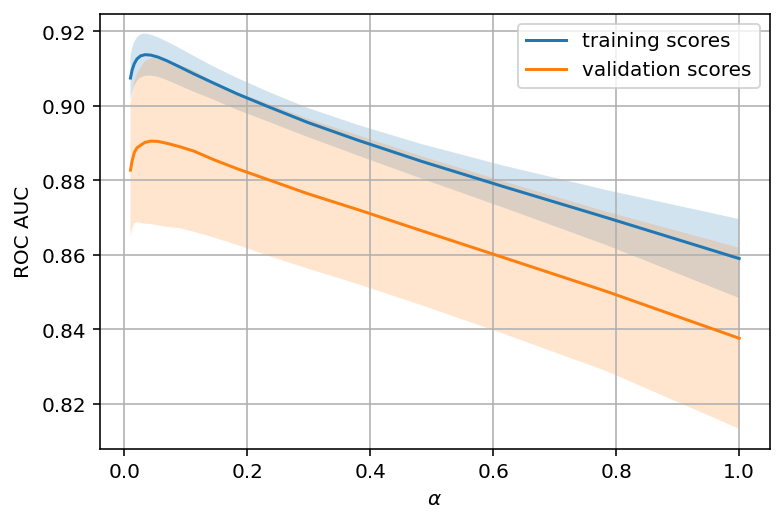

In [171]:
plot_with_err(alphas, val_train, label = 'training scores')
plot_with_err(alphas, val_test, label = 'validation scores')
plt.xlabel(r'$\alpha$')
plt.ylabel('ROC AUC')
plt.legend()
plt.grid()

In [172]:
def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    logit_pipe = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=degree)),
            (
                "sgd_logit",
                SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha, max_iter=5),
            ),
        ]
    )
    N_train, val_train, val_test = learning_curve(
        logit_pipe, X, y, train_sizes=train_sizes, cv=5, scoring="roc_auc"
    )
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("AUC")
    plt.legend()
    plt.grid(True);

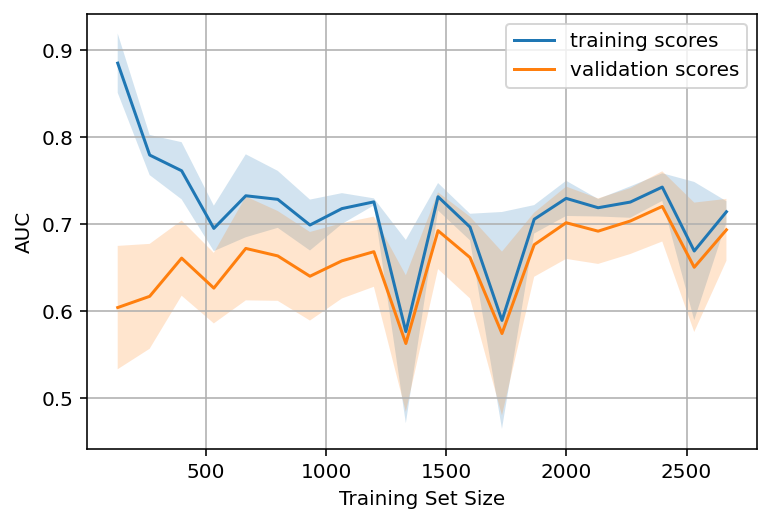

In [173]:
plot_learning_curve(degree=2, alpha=10)

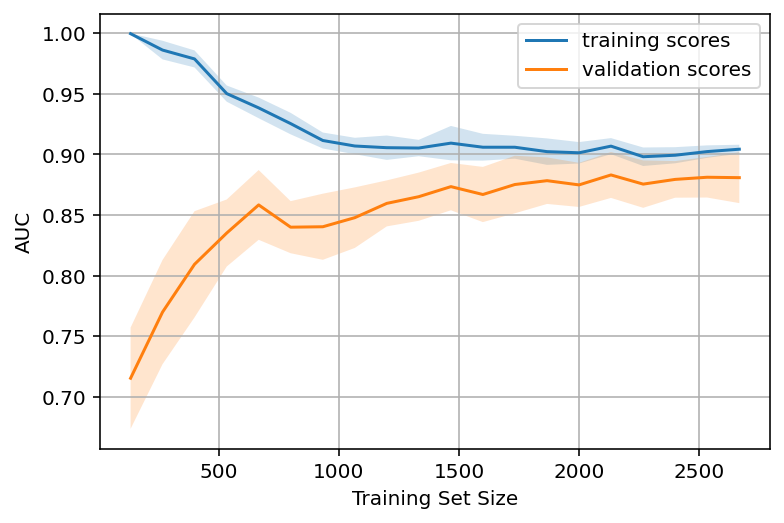

In [174]:
plot_learning_curve(2, 0.05)

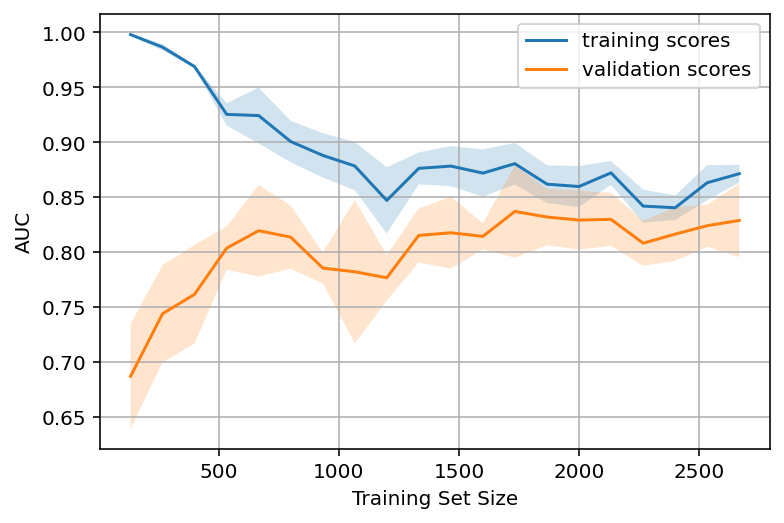

In [175]:
plot_learning_curve(2, 1e-4)